## Center Selection
Following Kleinberg and Tardos

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations, product
import matplotlib.patches as patches
import math

## Problem Description
Consider the following scenario. We have a set S of n sites—say, n little towns in upstate New York. We want to select k centers for building large shopping malls. We expect that people in each of these n towns will shop at one of the malls, and so we want to select the sites of the k malls to be central.
Let us start by defining the input to our problem more formally. We are given an integer k, a set S of n sites (corresponding to the towns), and a distance function. The goal is to select k of the sites to become centers in such a way that the maximum distance that 
any person needs to travel in order to visit a center is as small as possible.
We describe a greedy algorithm so that the maximum disntance is within a factor of 2 of the optimal distance for centers placed anywehere, not necessarily on sites.

## Algorithm description
There are greedy ways to find solutions within a factor of two.

## Generate Instances

In [167]:
def make_cities(n=30):
    ans=[]
    for i in range(n):
        ans.append((random.uniform(-100,100),random.uniform(-100,100)))
    return ans

## Distance function

In [153]:
def distance(x,y):
    return math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

## Distance between finite sets

In [154]:
def set_distance(X,Y):
    ans=distance(X[0],Y[0])
    for x,y in product(X,Y):
        ans=min(ans,distance(x,y))
    return ans
        

## Find Radius

In [155]:
def find_radius(places,centers):
    distance_list=[]
    for place in places:
        distance_list.append(set_distance(centers,[place]))
    return max(distance_list)


## Greedy algorithm given r

In this version of the problem instead of fixing k, the number of centers, the radius r is given. The algorithm returns either a solution with radius 2r or proof that there is no solution with radius r.

In [158]:

## Receives a list of points and a radius r. 
### Returns a list of centers that cover the sites with radius 2r

def Greedy_centers_given_r(instance:list,r:float):
    
    remaining=instance.copy()
    centers=[]
    while remaining:
        new_center=remaining[0]
        centers.append(new_center)
        remaining=[place for place in remaining if distance(place,new_center)>2*r]
            
    return centers
            

## Greedy algorithm

In [282]:
## Receives a list of points and an integer, the number of centers
## Returns a dictionary with keys {"centers","radius"} with values
## A list of k centers and the minimal radius for those centers
## This solution is within a factor of 2 of the optimal solution
def Greedy_centers(instance:list,k:int): 
    if k>len(instance):
        return instance
    # choose the first center randomly
    centers=[instance[0]]
    #consider the remaining centers
    remaining=instance[1:].copy()
    distance_to_center=dict()
    for place in remaining:
        distance_to_center[place]=distance(place,instance[0])
    for i in range(k-1):
        new=remaining[0]
        for place in remaining:
            if distance_to_center[place]>distance_to_center[new]:
                new=place
        centers.append(new)
        remaining=[remainer for remainer in remaining if remainer !=new]
        for place in remaining:
            distance_to_center[place]=min(distance_to_center[place],distance(place,new))
    ans=dict()
    ans["centers"]=centers
    ans["radius"]=find_radius(instance,centers)
    return ans
        


In [273]:
def plot_instance(places):
    
    # List of points
    points = places.copy()
    fig, ax = plt.subplots()
    ax.set_facecolor('black')
    fig.set_facecolor('black')
    ax.set_title("Distribution of places",color="white")
    # Plot the points
    for x, y in points:
        ax.plot(x, y, 'o',color="deeppink")  # 'bo' means blue color, round points
    #ax.set_aspect('equal', 'box')
   
    plt.show()


In [269]:
instance=make_cities()

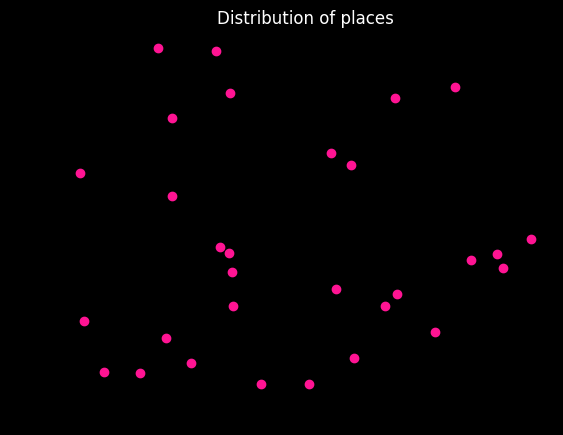

In [275]:
plot_instance(instance)

## Animate greedy centers given r

In [276]:
def animate_greedy_centers_given_r(places, r):

    fig, ax = plt.subplots()

    # format figure
    fig.set_facecolor('black')
    ax.set_facecolor('black')
     # List of points
    ax.set_xlim(min([place[0] for place in places])-2*r, max([place[0] for place in places])+2*r)   # Setting x-axis limits
    ax.set_ylim(min([place[1] for place in places])-2*r, max([place[1] for place in places])+2*r)   # Setting x-axis limits
    ax.set_title(f"Center Selection given  r={r}",color="white",fontsize=18) 
    # List of centers and their radii
    #radii = [0.5, 1]

    # Plot the points
    for x, y in places:
        ax.plot(x, y, 'o',color="deeppink")  # 'bo' means blue color, round points

    # Plot the circles
    # for center in centers:
    #     circle = patches.Circle(center, radius, fc='none', ec='r',color="deeppink")  # fc is face color, ec is edge color
    #     ax.add_patch(circle)

    # # Set aspect of the plot to be equal, so circles aren't elliptic
    ax.set_aspect('equal', 'box')
    frames=list(enumerate([None]+Greedy_centers_given_r(places,r)))
    count_text=ax.text(110, -110, "",color="white",fontsize=10)## Counter
    def animate(center):
        if center[1] != None:
            circle = patches.Circle(center[1], 2*r, fc='none', ec='palegreen')  # fc is face color, ec is edge color
            ax.add_patch(circle)
            for place in places:
                if distance(place,center[1])<=2*r:
                    ax.plot(place[0], place[1], 'o',color="palegreen")
        count=center[0]
        count_text.set_text(f"Circle count ={count}")

    ani = FuncAnimation(fig, animate, frames=frames, blit=False)
    ## Uncommment to save animation as .gif
    #ani.save("/Users/camiloariasabad/Downloads/knapsack.gif", writer=PillowWriter(fps=20))
    return HTML(ani.to_jshtml())

In [277]:
instance=make_cities(100)

In [286]:
Greedy_centers(instance,10)

{'centers': [(17.56487551444576, 53.182136819922164),
  (-91.63260608247215, -94.80431911530458),
  (93.56174695307843, -90.15569285173244),
  (-89.24995393469317, 93.71994009577608),
  (-15.220039258162927, -33.76826730327542),
  (-97.93657444024375, 7.664416146012428),
  (97.25048683407203, 26.01889123230015),
  (53.53227585058028, -26.093968212395538),
  (0.989418158136516, -95.67201890482981),
  (72.0941315792573, 76.97988354347731)],
 'radius': 55.796363178369376}

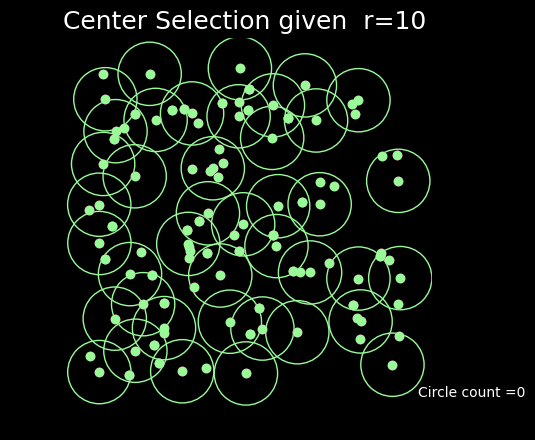

In [287]:
animate_greedy_centers_given_r(instance,10)

## Animate greedy centers

In [298]:
def animate_greedy_centers(places,k):

    info=Greedy_centers(places,k)
    centers=info["centers"]
    r=info["radius"]
    fig, ax = plt.subplots()

    # format figure
    fig.set_facecolor('black')
    ax.set_facecolor('black')
     # List of points
    ax.set_xlim(min([place[0] for place in places])-r, max([place[0] for place in places])+r)   # Setting x-axis limits
    ax.set_ylim(min([place[1] for place in places])-r, max([place[1] for place in places])+r)   # Setting x-axis limits
       
    # List of centers and their radii
    #radii = [0.5, 1]

    # Plot the points
    for x, y in places:
        ax.plot(x, y, 'o',color="deeppink")  # 'bo' means blue color, round points

    # Plot the circles
    # for center in centers:
    #     circle = patches.Circle(center, radius, fc='none', ec='r',color="deeppink")  # fc is face color, ec is edge color
    #     ax.add_patch(circle)

    # # Set aspect of the plot to be equal, so circles aren't elliptic
    ax.set_aspect('equal', 'box')
    ax.set_title("Center Selection",color="white",fontsize=18)
    
    N=len(centers)
    frames=[None]+list(enumerate([("punto",center) for center in centers ],start=1))+list(enumerate([("circle",center) for center in centers],start=1))

    centers_count_text=ax.text(110, -110, "Center count = 0",color="white",fontsize=10)## Counter
    circles_count_text=ax.text(110, -120, "Circle count =0",color="white",fontsize=10)## Counter
    
    
    def animate(frame):
        if frame != None:
            if frame[1][0]=="punto":
                ax.plot(frame[1][1][0], frame[1][1][1], 'o',color="yellow")
            
            else:
                circle = patches.Circle(frame[1][1], r, fc='none', ec='palegreen')  # fc is face color, ec is edge color
                ax.add_patch(circle)
                for place in places:
                    if distance(place,frame[1][1])<=r:
                        ax.plot(place[0], place[1], 'o',color="palegreen")
            
            circle_count=0
            center_count=0
            if frame[1][0]=="punto":
               center_count=frame[0]
               centers_count_text.set_text(f"Centers count ={center_count}")
            elif frame[1][0]=="circle":
                circle_count=frame[0]
                circles_count_text.set_text(f"Circles count ={circle_count}")
            # for place in places:
            #     if distance(place,center)<=2*r:
            #         ax.plot(place[0], place[1], 'o',color="red")


    ani = FuncAnimation(fig, animate, frames=frames, blit=False)
    ## Uncommment to save animation as .gif
    #ani.save("/Users/camiloariasabad/Downloads/knapsack.gif", writer=PillowWriter(fps=20))
    return HTML(ani.to_jshtml())

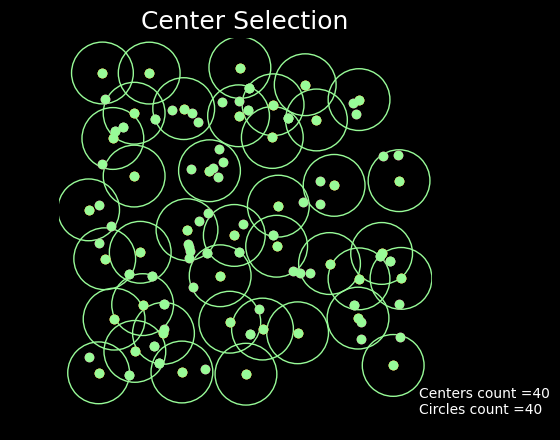

In [299]:
animate_greedy_centers(instance,40)